In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Reproyección gdalwarp**

In [2]:
from osgeo import gdal
ds = gdal.Open('/content/drive/My Drive/Curso-RV-python/ndwi.tif')
gdal.Warp('ndwi_UTM.tif',ds,options=gdal.WarpOptions(dstSRS='EPSG:32614'))
# gdal.Warp es para reproyecciones, cambar la resolución, recortes

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fc3b4443360> >

# Nueva sección

# **Introducción a Vectorial (Shapely Geopandas)**







**Shapely**

Shapely es un paquete de Python con licencia BSD para la manipulación y el análisis de objetos geométricos planos. Se basa en las bibliotecas GEOS (el motor de PostGIS ) y JTS (desde las cuales se transfiere GEOS), ampliamente implementadas . Shapely no se preocupa por los formatos de datos o los sistemas de coordenadas, pero puede integrarse fácilmente con los paquetes que sí lo están

In [0]:
from shapely.geometry import Point,LineString,LinearRing,Polygon,MultiLineString,MultiPoint,MultiPolygon 


Punto

In [4]:
punto = Point(1,-1)
print('tipo: ', type(punto))

tipo:  <class 'shapely.geometry.point.Point'>


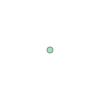

In [0]:
punto

Coordenadas

In [5]:
print('Coordenada x de punto: ', punto.x)
print('Coordenada y de punto: ', punto.y)

Coordenada x de punto:  1.0
Coordenada y de punto:  -1.0


Distancia

In [10]:
punto.distance(Point(2,0))

1.4142135623730951

Union

In [16]:
punto.union(Point(1,0))
print(type(punto.union(Point(1,0))))
multiPoint = punto.union(Point(3,0))
len(punto.union(Point(3,0)))

<class 'shapely.geometry.multipoint.MultiPoint'>


2

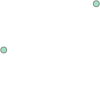

In [17]:
multiPoint


Multipoint

2
POINT (1 -1)


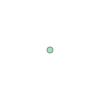

In [22]:
print(len(multiPoint))
print(multiPoint[0])
multiPoint[0]

POINT (3 0)


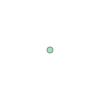

In [23]:
print(multiPoint[1])
multiPoint[1]

Buffer

<class 'shapely.geometry.polygon.Polygon'>


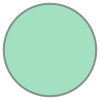

In [26]:
print(type(punto.buffer(10)))
punto.buffer(1)

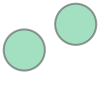

In [31]:
multiPoint.buffer(0.8) # buffer zona de influencia

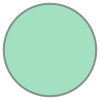

In [35]:
punto.union(Point(1, -1).buffer(1))

Linea

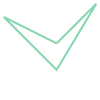

In [38]:
linea = LineString([(1,2), (2,3), (4,5), (1,0), (-3,4), (1, 2)])
linea

Perimetro

In [39]:
print(linea.bounds) # coordenadas maximas y minimas que tiene el elemento
linea.length # Longitud

(-3.0, 0.0, 4.0, 5.0)


20.202582786456546

Distancia

In [40]:
linea.distance(Point(10,10))

7.810249675906654

Buffer

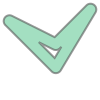

In [41]:
linea.buffer(0.5)

In [42]:
linea.is_closed

True

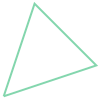

In [43]:
lineaRing = LinearRing([(1,0),(2,3),(4,1)])
lineaRing

LineRing

True


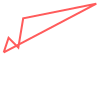

In [47]:
lineaRing = LinearRing([(1,0),(2,3),(4,1),(5,7),(20,10)]) # cierra la linea, minimo 3 puntos
print(lineaRing.is_closed)
lineaRing


Buffer

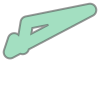

In [51]:
lineaRing.buffer(1.5)

Poligono

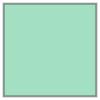

In [52]:
poli = Polygon([(0,0),(1,0),(1,1),(0,1),(0,0)])
poli

Area

In [53]:
poli.area

1.0

Perimetro

In [54]:
poli.length

4.0

Centroide

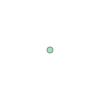

In [55]:
poli.centroid

Contorno

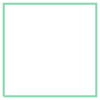

In [57]:
poli.exterior

In [65]:
print(type(poli.exterior))
print(poli.exterior.xy)
type(poli.exterior.xy) # Tupla con las coordenadas del poligono 
poli.exterior.xy[0][0]

<class 'shapely.geometry.polygon.LinearRing'>
(array('d', [0.0, 1.0, 1.0, 0.0, 0.0]), array('d', [0.0, 0.0, 1.0, 1.0, 0.0]))


0.0

Buffer

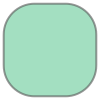

In [70]:
poli.buffer(1)

Contiene

In [71]:
print(poli.contains(Point(0.5,0.5)))
poli.contains(Point(2,3))

True


False

### Manejo de Geodataframe

**Geopandas**

GeoPandas es un proyecto de código abierto para facilitar el trabajo con datos geoespaciales en python. GeoPandas extiende los tipos de datos utilizados por los pandas para permitir operaciones espaciales en tipos geométricos. Las operaciones geométricas se realizan por bien proporcionado . Geopandas depende además de fiona para acceder a los archivos y descartes y matplotlib para trazar.

Instalacion

In [72]:
!pip install geopandas

     |████████████████████████████████| 921kB 4.6MB/s 
     |████████████████████████████████| 10.1MB 10.5MB/s 
     |████████████████████████████████| 11.8MB 55.4MB/s 


Importación

In [0]:
import geopandas as gpd

Apertura

In [0]:
df = gpd.read_file('/content/drive/My Drive/Curso-RV-python/muni_2018gw/muni_2018gw.shp')

Inspección

In [76]:
df.head()

CVE_ENT CVE_MUN  ... COV_ID                                           geometry
0      01     001  ...      1  POLYGON ((-102.09775 22.02325, -102.09857 22.0...
1      01     002  ...      2  POLYGON ((-101.99941 22.21951, -101.99940 22.2...
2      01     003  ...      3  POLYGON ((-102.57625 21.96778, -102.57626 21.9...
3      01     004  ...      4  POLYGON ((-102.25320 22.37449, -102.25239 22.3...
4      01     005  ...      5  POLYGON ((-102.31034 22.03716, -102.30653 22.0...

[5 rows x 10 columns]

In [83]:
df.shape

(2463, 10)

In [77]:
df.describe()

AREA     PERIMETER         COV_       COV_ID
count  2.463000e+03   2463.000000  2463.000000  2463.000000
mean   7.936483e+04    793.648276  1231.000000  1232.000000
std    2.086686e+05   2086.686137   711.151179   711.151179
min    2.214071e+02      2.214070     0.000000     1.000000
25%    8.588207e+03     85.882065   615.500000   616.500000
50%    2.313550e+04    231.355020  1231.000000  1232.000000
75%    6.602999e+04    660.299935  1846.500000  1847.500000
max    5.323784e+06  53237.840870  2462.000000  2463.000000

In [78]:
df.columns # Tupla

Index(['CVE_ENT', 'CVE_MUN', 'CVEGEO', 'NOM_ENT', 'AREA', 'PERIMETER',
       'NOM_MUN', 'COV_', 'COV_ID', 'geometry'],
      dtype='object')

In [79]:
df["NOM_MUN"]

0               Aguascalientes
1                     Asientos
2                     Calvillo
3                       CosÃ­o
4                JesÃºs MarÃ­a
                 ...          
2458             Villa Hidalgo
2459                Villanueva
2460                 Zacatecas
2461                  Trancoso
2462    Santa MarÃ­a de la Paz
Name: NOM_MUN, Length: 2463, dtype: object

Acceso a columas

In [80]:
print("Area: \n", df['AREA'])
type(df['AREA'])

Area: 
 0       116635.92455
1        54337.42654
2        92335.78320
3        12838.35453
4        49989.50926
            ...     
2458     37142.59872
2459    215650.56021
2460     43678.57090
2461     21844.70068
2462     27566.66479
Name: AREA, Length: 2463, dtype: float64


pandas.core.series.Series

In [81]:
df.AREA

0       116635.92455
1        54337.42654
2        92335.78320
3        12838.35453
4        49989.50926
            ...     
2458     37142.59872
2459    215650.56021
2460     43678.57090
2461     21844.70068
2462     27566.66479
Name: AREA, Length: 2463, dtype: float64

Calculos geometricos

Extremos

In [82]:
df.bounds

minx       miny        maxx       maxy
0    -102.583143  21.622266 -102.064508  22.075343
1    -102.219330  21.958388 -101.854160  22.306073
2    -102.874177  21.715609 -102.529619  22.106530
3    -102.378443  22.281557 -102.238848  22.459590
4    -102.598873  21.806360 -102.264751  22.062767
...          ...        ...         ...        ...
2458 -101.846959  22.292948 -101.586541  22.520422
2459 -103.154843  21.994811 -102.601107  22.675870
2460 -102.849731  22.617180 -102.539319  22.841472
2461 -102.402920  22.676173 -102.217318  22.834525
2462 -103.511733  21.429781 -103.169782  21.592381

[2463 rows x 4 columns]

area

In [84]:
df.area

0       0.102900
1       0.048057
2       0.081518
3       0.011375
4       0.044144
          ...   
2458    0.032921
2459    0.190977
2460    0.038812
2461    0.019414
2462    0.024265
Length: 2463, dtype: float64

perimetro

In [85]:
df.length

0       2.420713
1       1.804404
2       1.610751
3       0.690669
4       1.541208
          ...   
2458    1.126578
2459    3.312681
2460    1.316645
2461    0.625554
2462    1.019240
Length: 2463, dtype: float64

distancia

In [86]:
df.distance(Point(-103,34)) # distancia de cada municipio al punto

0       11.955565
1       11.730405
2       11.897589
3       11.561723
4       11.954658
          ...    
2458    11.553401
2459    11.326155
2460    11.160938
2461    11.192874
2462    12.414690
Length: 2463, dtype: float64

In [87]:
df.distance(df) # Distancia al mismo df

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2458    0.0
2459    0.0
2460    0.0
2461    0.0
2462    0.0
Length: 2463, dtype: float64

buffer

In [88]:
df.buffer(0.5)


0       POLYGON ((-102.18599 21.14268, -102.19878 21.1...
1       POLYGON ((-102.71782 22.14371, -102.71780 22.1...
2       POLYGON ((-102.39754 21.27959, -102.39762 21.2...
3       POLYGON ((-102.80705 22.61727, -102.80082 22.6...
4       POLYGON ((-103.09472 21.92536, -103.09510 21.9...
                              ...                        
2458    POLYGON ((-102.28267 22.59913, -102.28223 22.6...
2459    POLYGON ((-103.64800 22.15303, -103.64634 22.1...
2460    POLYGON ((-103.33280 22.93967, -103.33152 22.9...
2461    POLYGON ((-102.89881 22.82754, -102.89755 22.8...
2462    POLYGON ((-103.97532 21.39639, -103.98075 21.4...
Length: 2463, dtype: geometry

Localizacion por pocision

In [89]:
df.iloc[2]

CVE_ENT                                                     01
CVE_MUN                                                    003
CVEGEO                                                   01003
NOM_ENT                                         Aguascalientes
AREA                                                   92335.8
PERIMETER                                              923.358
NOM_MUN                                               Calvillo
COV_                                                         2
COV_ID                                                       3
geometry     POLYGON ((-102.5762505699791 21.96778072040316...
Name: 2, dtype: object

Graficacion

Villa Victoria


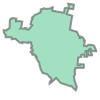

In [102]:
print(df.NOM_MUN[765])
df.iloc[765]['geometry']

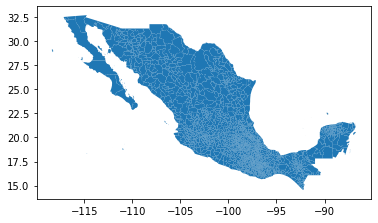

In [104]:
df.plot()

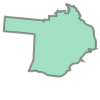

In [111]:
df.iloc[0][9]
df['geometry'][0]
df['geometry'][45]


NezahualcÃ³yotl
MÃ©xico
POINT (-99.02269951694664 19.42257865636755)


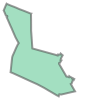

In [153]:
print(df['NOM_MUN'][713])
print(df.iloc[713]['NOM_ENT'])
print(df['geometry'][713].centroid)
df['geometry'][713]

### Depuración de datos vectoriales

In [115]:
df[df['NOM_ENT'] == 'MÃ©xico'] # Acceder a todos los registros de Oaxaca
 

CVE_ENT CVE_MUN  ... COV_ID                                           geometry
661      15     001  ...    662  POLYGON ((-99.92634 20.06433, -99.92581 20.063...
662      15     002  ...    663  POLYGON ((-98.84075 19.63558, -98.84076 19.635...
663      15     003  ...    664  POLYGON ((-99.92238 20.23114, -99.92234 20.231...
664      15     004  ...    665  MULTIPOLYGON (((-99.89418 18.91340, -99.89309 ...
665      15     005  ...    666  POLYGON ((-99.90180 19.54534, -99.90072 19.545...
..      ...     ...  ...    ...                                                ...
781      15     073  ...    782  POLYGON ((-99.51480 19.18435, -99.51481 19.184...
782      15     012  ...    783  POLYGON ((-99.48022 19.17109, -99.48030 19.171...
783      15     018  ...    784  POLYGON ((-99.60820 19.21590, -99.60853 19.214...
784      15     101  ...    785  POLYGON ((-99.31337 19.21897, -99.31230 19.218...
785      15     112  ...    786  POLYGON ((-99.38783 19.77734, -99.38825 19.776...

[125 rows x 10 columns]

Graficacion

df[df['NOM_ENT'] == 'Oaxaca'].plot()

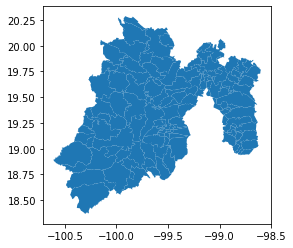

In [116]:
df[df['NOM_ENT'] == 'MÃ©xico'].plot()

In [122]:
df[df['AREA'] < 1000]

CVE_ENT CVE_MUN  ... COV_ID                                           geometry
666       15     006  ...    667  POLYGON ((-99.48792 19.14965, -99.48821 19.149...
687       15     030  ...    688  POLYGON ((-98.88385 19.53604, -98.88451 19.536...
701       15     044  ...    702  MULTIPOLYGON (((-99.09852 19.76401, -99.09709 ...
724       15     069  ...    725  POLYGON ((-98.84668 19.55325, -98.84675 19.552...
776       15     125  ...    777  POLYGON ((-99.04520 19.69768, -99.04543 19.696...
782       15     012  ...    783  POLYGON ((-99.48022 19.17109, -99.48030 19.171...
1009      20     007  ...   1010  POLYGON ((-96.71199 16.76299, -96.71198 16.762...
1035      20     033  ...   1036  POLYGON ((-96.78387 17.17937, -96.78391 17.179...
1037      20     035  ...   1038  POLYGON ((-96.49640 17.29959, -96.49739 17.299...
1064      20     062  ...   1065  POLYGON ((-96.41550 17.29975, -96.41566 17.299...
1065      20     063  ...   1066  POLYGON ((-96.81843 17.18723, -96.81823 17.187...
1089      20     087  ...   1090  POLYGON ((-96.68799 17.09073, -96.68798 17.090...
1103      20     101  ...   1104  POLYGON ((-96.83939 16.59295, -96.84329 16.586...
1122      20     120  ...   1123  POLYGON ((-96.22668 17.23349, -96.23082 17.232...
1159      20     157  ...   1160  POLYGON ((-96.75773 17.07957, -96.75782 17.079...
1176      20     174  ...   1177  POLYGON ((-96.70730 16.98262, -96.70766 16.982...
1194      20     192  ...   1195  POLYGON ((-96.68085 16.83909, -96.68085 16.839...
1230      20     228  ...   1231  POLYGON ((-96.91075 18.23876, -96.90982 18.238...
1240      20     238  ...   1241  POLYGON ((-96.71019 16.64695, -96.71400 16.642...
1251      20     249  ...   1252  POLYGON ((-96.85690 18.15333, -96.85591 18.152...
1303      20     301  ...   1304  POLYGON ((-96.72320 16.74822, -96.72290 16.748...
1305      20     303  ...   1306  POLYGON ((-96.24938 17.15734, -96.24984 17.157...
1317      20     315  ...   1318  POLYGON ((-96.68937 16.74714, -96.68939 16.747...
1324      20     322  ...   1325  POLYGON ((-96.90228 18.19567, -96.90216 18.195...
1340      20     338  ...   1341  POLYGON ((-96.80488 17.21510, -96.80423 17.214...
1344      20     342  ...   1345  POLYGON ((-96.76283 16.99747, -96.76283 16.997...
1352      20     350  ...   1353  MULTIPOLYGON (((-96.66386 17.06065, -96.66341 ...
1376      20     374  ...   1377  POLYGON ((-96.85690 18.15333, -96.85722 18.153...
1377      20     375  ...   1378  POLYGON ((-96.68346 17.03156, -96.68774 17.034...
1391      20     389  ...   1392  POLYGON ((-96.75126 16.81147, -96.75246 16.803...
1392      20     390  ...   1393  MULTIPOLYGON (((-96.69589 17.08170, -96.69555 ...
1398      20     396  ...   1399  POLYGON ((-96.79154 18.11301, -96.79171 18.112...
1405      20     403  ...   1406  POLYGON ((-96.68181 16.96347, -96.68982 16.964...
1413      20     411  ...   1414  POLYGON ((-96.59855 17.00675, -96.59916 17.005...
1505      20     503  ...   1506  POLYGON ((-96.24896 17.23227, -96.25005 17.228...
1669      21     097  ...   1670  POLYGON ((-97.87204 18.90731, -97.87210 18.907...
1689      21     117  ...   1690  MULTIPOLYGON (((-97.80913 19.25964, -97.80951 ...
1705      21     133  ...   1706  POLYGON ((-98.36118 18.64112, -98.36119 18.641...
1708      21     136  ...   1709  POLYGON ((-98.30631 19.18876, -98.30548 19.188...
1745      21     173  ...   1746  POLYGON ((-97.44331 19.86200, -97.44351 19.861...
2066      29     042  ...   2067  POLYGON ((-98.23057 19.18661, -98.23055 19.186...
2075      29     051  ...   2076  POLYGON ((-98.25737 19.26365, -98.25726 19.263...
2077      29     053  ...   2078  POLYGON ((-98.24082 19.23271, -98.24096 19.232...
2078      29     054  ...   2079  POLYGON ((-98.27357 19.21164, -98.27373 19.212...
2080      29     056  ...   2081  POLYGON ((-98.32060 19.30048, -98.32078 19.298...
2081      29     057  ...   2082  POLYGON ((-98.30225 19.26311, -98.30250 19.262...
2083      29     059  ...   2084  POLYGON ((-98.21321 19.

Depuracion por valores

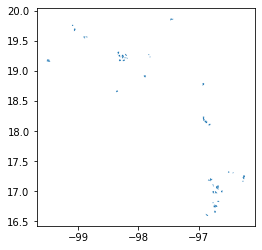

In [132]:
df[df['AREA'] < 1000].plot()

Depuracion por String

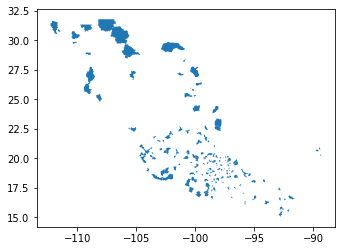

In [138]:
df[df['NOM_MUN'].str[0] == 'A'].plot() # municipios que empiezan con A

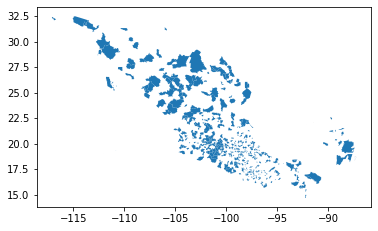

In [139]:
df[df['NOM_MUN'].str[-1] == 'o'].plot() # municipios que terminan con o

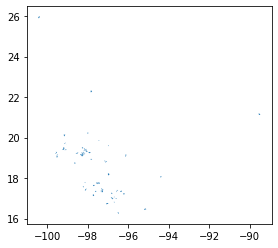

In [143]:
df[(df['NOM_MUN'].str[-1] == 'o') & (df['AREA'] < 5000)].plot() # municipios que terminan con o y tienen Area<5000

In [144]:
df[(df['NOM_MUN'].str[-1] == 'o') & (df['AREA'] < 5000)].distance(Point(0, 0)) # municipios que

270     101.035868
274     100.939271
284     101.050113
515     101.129716
666     101.289874
           ...    
2220     98.917070
2222     98.919321
2289     96.057731
2297     98.850505
2318     91.932435
Length: 69, dtype: float64

In [145]:
df[df['NOM_MUN'].str[0] == 'A' ].distance(Point(0,0))

0       104.365887
1       104.209428
32      104.515893
33      104.997462
34      104.648175
           ...    
2300     91.736453
2301     91.568548
2405    105.137778
2406    104.842978
2407    105.590658
Length: 198, dtype: float64

## Ejercicio de aplicación

Con el shape de municipios, generar un programa que solicite al usuario coordenadas, y devuelva la entidad, municipio, area, perimetro, la distancia a la ciudad de mexico(-99.13,19.43) y grafique la linea de punto a punto

In [150]:
x = -99
y = 19.39
df[df['geometry'].contains(Point(x, y)) == True]

CVE_ENT CVE_MUN  ... COV_ID                                           geometry
713      15     058  ...    714  POLYGON ((-99.02880 19.48458, -99.02890 19.484...

[1 rows x 10 columns]

Lon:-100
Lat:18
Entidad: Guerrero
Municipio: Apaxtla
Area: 62561.87637
Perimetro: 625.61876
Distancia: 158.39094829675827


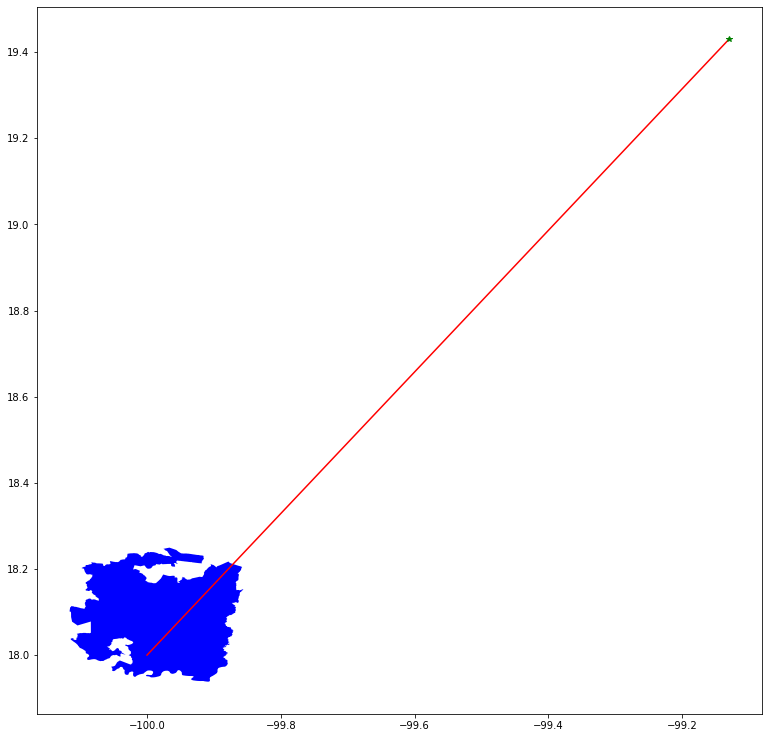

In [164]:
import matplotlib.pyplot as plt

x = float(input('Lon:'))
y = float(input('Lat:'))

print('Entidad:',df[df['geometry'].contains(Point(x,y)) == True]['NOM_ENT'].iloc[0])
print('Municipio:',df[df['geometry'].contains(Point(x,y)) == True]['NOM_MUN'].iloc[0])
print('Area:',df[df['geometry'].contains(Point(x,y)) == True]['AREA'].iloc[0])
print('Perimetro:',df[df['geometry'].contains(Point(x,y)) == True]['PERIMETER'].iloc[0])
print('Distancia:',df[df['geometry'].contains(Point(x,y)) == True].distance(Point(-99.13,19.43)).iloc[0] * 111.15)

plt.figure(figsize=(13,13))
plt.plot([x,-99.13],[y,19.43],'r-')
plt.plot([-99.13],[19.43],'g*')
plt.fill(df[df['geometry'].contains(Point(x,y)) == True]['geometry'].iloc[0].\
exterior.xy[0],df[df['geometry'].contains(Point(x,y)) == True]['geometry'].iloc[0].exterior.xy[1],'b')

### Poligonizacion(GDAL)

gdal_polygonize

In [165]:
import os
os.system('gdal_polygonize.py -q ndwi_UTM.tif -f "ESRI Shapefile" output_1.shp')
# -q hace referencia al archivo que se va a convertir
# se escribe la ruta del archivo, en este caso el archivo está en la raíz
# si no está en la raíz se tiene que escribir toda la ruta en donde está el archivo
# -f Hace referencia al formato al que se va a exportar entre comillas dobles
# Nombre de salida
# si se ejecuta correctamente arroja un cero

0

apertura 

In [167]:
df2 = gpd.read_file('output_1.shp')
df2
# 1 para elementos que contienen agua y 0 para elementos que no contienen agua

DN                                           geometry
0       1  POLYGON ((450673.602 2099788.132, 450693.603 2...
1       1  POLYGON ((450693.603 2099768.132, 450703.603 2...
2       1  POLYGON ((452773.657 2099758.132, 452793.657 2...
3       1  POLYGON ((455423.725 2099748.131, 455463.726 2...
4       1  POLYGON ((472924.178 2099748.131, 472964.179 2...
...    ..                                                ...
10761   1  POLYGON ((482654.430 2048616.808, 482664.431 2...
10762   1  POLYGON ((478764.330 2048646.808, 478794.330 2...
10763   1  POLYGON ((479424.347 2048626.808, 479444.347 2...
10764   1  POLYGON ((485324.499 2048606.807, 485334.500 2...
10765   0  POLYGON ((447213.513 2099798.133, 499994.879 2...

[10766 rows x 2 columns]

In [168]:
df2.crs #

{'init': 'epsg:32614'}

Graficacion

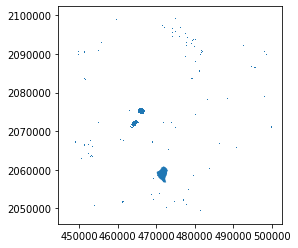

In [169]:
df2[df2['DN']==1].plot()

area

In [170]:
df2[df2['DN']==1].area

0         300.015534
1         100.005178
2         400.020712
3         800.041424
4        1300.067314
            ...     
10760     100.005178
10761     300.015534
10762    1400.072492
10763     500.025890
10764     100.005178
Length: 10486, dtype: float64

In [171]:
df2['AREA'] = df2.area # se anexa una columna área
df2

DN                                           geometry          AREA
0       1  POLYGON ((450673.602 2099788.132, 450693.603 2...  3.000155e+02
1       1  POLYGON ((450693.603 2099768.132, 450703.603 2...  1.000052e+02
2       1  POLYGON ((452773.657 2099758.132, 452793.657 2...  4.000207e+02
3       1  POLYGON ((455423.725 2099748.131, 455463.726 2...  8.000414e+02
4       1  POLYGON ((472924.178 2099748.131, 472964.179 2...  1.300067e+03
...    ..                                                ...           ...
10761   1  POLYGON ((482654.430 2048616.808, 482664.431 2...  3.000155e+02
10762   1  POLYGON ((478764.330 2048646.808, 478794.330 2...  1.400072e+03
10763   1  POLYGON ((479424.347 2048626.808, 479444.347 2...  5.000259e+02
10764   1  POLYGON ((485324.499 2048606.807, 485334.500 2...  1.000052e+02
10765   0  POLYGON ((447213.513 2099798.133, 499994.879 2...  2.846677e+09

[10766 rows x 3 columns]

Depuracion

In [172]:
df2[df2['DN']==0]

DN                                           geometry          AREA
20      0  POLYGON ((456553.755 2099608.128, 456563.755 2...  1.000052e+02
62      0  POLYGON ((449803.580 2099468.124, 449813.580 2...  1.000052e+02
184     0  POLYGON ((472804.175 2098728.105, 472824.176 2...  2.000104e+02
429     0  POLYGON ((496984.801 2097708.079, 496994.802 2...  1.000052e+02
460     0  POLYGON ((496854.798 2097638.077, 496874.799 2...  2.000104e+02
...    ..                                                ...           ...
10603   0  POLYGON ((458293.800 2050316.852, 458313.800 2...  2.000104e+02
10604   0  POLYGON ((458323.800 2050316.852, 458333.801 2...  1.000052e+02
10736   0  POLYGON ((471454.140 2048746.811, 471464.141 2...  1.000052e+02
10738   0  POLYGON ((471464.141 2048736.811, 471474.141 2...  1.000052e+02
10765   0  POLYGON ((447213.513 2099798.133, 499994.879 2...  2.846677e+09

[280 rows x 3 columns]

In [173]:
df2[df2['DN']==0].index
# df2 = df2[df2['DN']==0].index # Se puede reasignar para no utilizar inplace=True

Int64Index([   20,    62,   184,   429,   460,   512,   561,   575,   611,
              649,
            ...
             9887, 10116, 10133, 10418, 10419, 10603, 10604, 10736, 10738,
            10765],
           dtype='int64', length=280)

In [0]:
df2.drop( df2[ df2['DN'] == 0 ].index , inplace=True) 

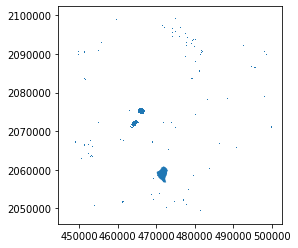

In [177]:
df2.plot()

In [0]:
df2['AREA'] = df2[df2['DN']==1].area

In [179]:
df2.columns

Index(['DN', 'geometry', 'AREA'], dtype='object')

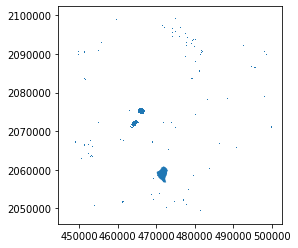

In [180]:
df2.plot()

Ecritura de archivo

In [0]:
df2.to_file('ndwi_depurado.shp',driver='ESRI Shapefile')